In [21]:
%pylab notebook
import gymness.aggregate as agg
import pandas as pd
from math import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Calibration for area

We put the probes in x=0 and try different W_em in DC Vmin= -8,  V_max=6.

Aggregating the fitted data for dataset=data_area_calibration

In [22]:
df = agg.aggregate_data('data/data_area_calibration')

df.head()

Reading dataset:['160509005', '160509004', '160509002', '160509012', '160509006', '160509003', '160509009', '160509001', '160509011', '160509008', '160509010', '160509007']


id  probe   x  I_B         P  W_em       T_e   err_T_e  \
0  160509005      1   0  600  0.000154    70  4.847783  0.042089   
1  160509005      2  10  600  0.000154    70  5.159949  0.038459   
2  160509004      1   0  600  0.000154    60  5.040478  0.033993   
3  160509004      2  10  600  0.000154    60  5.131603  0.045597   
4  160509002      1   0  600  0.000153    40  5.041797  0.027548   

            n_e       err_n_e    ...          err_f_ep   v_plasma  \
0  1.756321e+16  1.535773e+14    ...      2.962561e-10   9.377376   
1  3.203550e+16  2.187540e+14    ...      1.712991e-10  12.638628   
2  1.394120e+16  1.112059e+14    ...      3.033360e-10   8.549332   
3  2.900757e+16  2.091250e+14    ...      1.900576e-10  12.236938   
4  1.241137e+16  8.823129e+13    ...      2.865097e-10   8.094347   

   err_v_plasma     alpha  err_alpha  v_floating  err_v_floating  i_ionic_sat  \
0      0.175388  0.026919   0.000871   -5.165974        0.049120    -0.000257   
1      0.169358  0.018728   0.000540   -2.841220        0.053980    -0.000484   
2      0.148511  0.031865   0.000917   -6.572102        0.046532    -0.000208   
3      0.199832  0.019363   0.000530   -3.157872        0.063042    -0.000437   
4      0.121347  0.032687   0.000855   -7.031045        0.038703    -0.000186   

   err_i_ionic_sat      j_sat  
0         0.000004 -21.450875  
1         0.000006 -40.366741  
2         0.000003 -17.362229  
3         0.000005 -36.450830  
4         0.000002 -15.459020  

[5 rows x 21 columns]

### Checking ratio of I ionic saturation for different probes at x=0

<IPython.core.display.Javascript object>


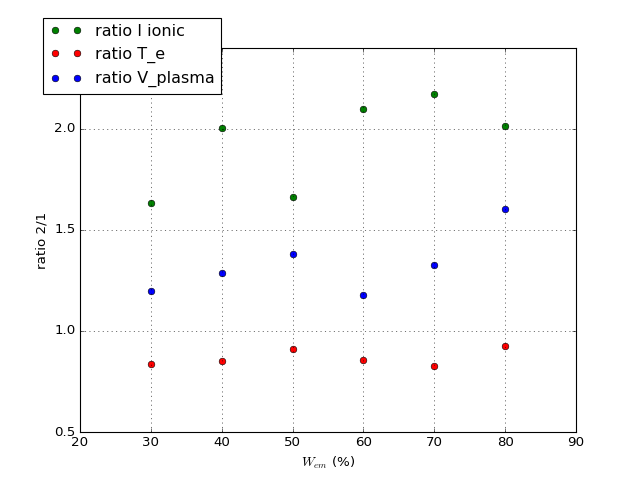

I ionic saturation BIAS ration: 1.93007 +- 0.22845
T_e BIAS ration 0.86737 +- 0.04092
V Plasma 1.32845 +- 0.1543


0.93007101400852887

In [36]:
s1 = df[(df.probe==1) & (df.x==0)].set_index('W_em')
s2 = df[(df.probe==2) & (df.x==0)].set_index('W_em')

fig, ax = plt.subplots(1,1)
ax.plot(s1.index, s2.i_ionic_sat / s1.i_ionic_sat,'og', label="ratio I ionic")
ax.plot(s2.index, s2.T_e / s1.T_e,'or',label="ratio T_e")
ax.plot(s2.index, s2.v_plasma / s1.v_plasma,'ob',label="ratio V_plasma")
ax.set_xlabel('$W_{em}$ (%)')
ax.set_xbound(20,90)
ax.set_ybound(0.5,2.4)
ax.set_ylabel('ratio 2/1')
ax.legend(bbox_to_anchor=(0.3,1.1))
ax.grid()
fig.savefig("export/calibration/calibration_current_previous.png")

bias_mean = (s2.i_ionic_sat/ s1.i_ionic_sat).mean()
std=(s2.i_ionic_sat/ s1.i_ionic_sat).std()

print("I ionic saturation BIAS ration: {} +- {}".format(round(bias_mean,5), round(std,5)))
print("T_e BIAS ration {} +- {}".format(round((s2.T_e/ s1.T_e).mean(),5), round((s2.T_e /s1.T_e).std(),5)))
print("V Plasma {} +- {}".format(round((s2.v_plasma/ s1.v_plasma).mean(),5), round((s2.v_plasma /s1.v_plasma).std(),5)))

((s2.i_ionic_sat - s1.i_ionic_sat) / s1.i_ionic_sat).mean()

## Test changing gain

DATASET= data_calib_isat

W = 60%. probe1 and probe2 at x=0.  p=1.54e-4 mbar  I=600A  Vfixed = -6 (*7.41)

In [24]:
from gymness import binning

R_1 = 502.13
R_2 = 502.35

df_all = pd.DataFrame(columns=['probe','gain','i'])
d = []

### Example

<IPython.core.display.Javascript object>


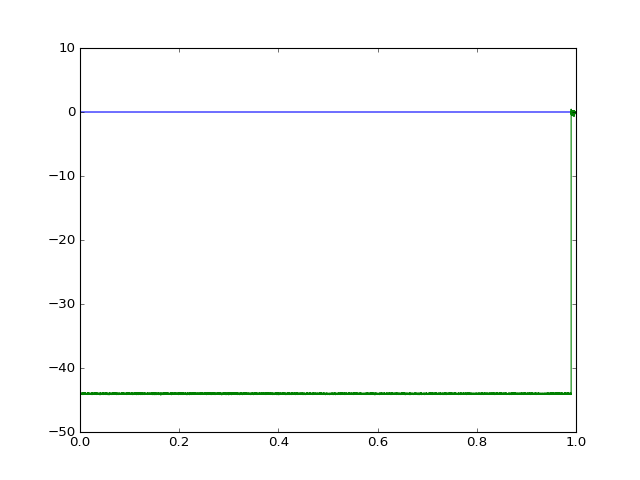

I: -0.0008113912009845314


In [25]:
file_path1 = 'data/data_calib_isat/160509044.txt' 
df1 = binning.read_data(file_path1, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', 2)])
binning.calculate_data(df1, R_2) #compute the current and v_probe
fig2, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.i_raw)
ax.plot(df1.t, df1.v_probe)
i_mean = df1[(df1.t > 0.15) & (df1.t <0.8)].i_raw.mean()
d.append({"probe":2, "gain":0.5, "i":i_mean})
print('I: {}'.format(i_mean))

### Calculate data for all dataset = data_calib_isat

I ionic sat current measure with constant V in

In [26]:
file_path1 = 'data/data_calib_isat/160509045.txt' 
df1 = binning.read_data(file_path1, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', 1)])
binning.calculate_data(df1, R_2) #compute the current and v_probe
i_mean = df1[(df1.t > 0.15) & (df1.t <0.8)].i_raw.mean()
d.append({"probe":2, "gain":1, "i":i_mean})

file_path1 = 'data/data_calib_isat/160509046.txt' 
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', -2)])
binning.calculate_data(df1, R_2) #compute the current and v_probe
i_mean = df1[(df1.t > 0.15) & (df1.t <0.8)].i_raw.mean()
d.append({"probe":1, "gain":0.5, "i":i_mean})

file_path1 = 'data/data_calib_isat/160509047.txt' 
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', -1)])
binning.calculate_data(df1, R_2) #compute the current and v_probe
i_mean = df1[(df1.t > 0.15) & (df1.t <0.8)].i_raw.mean()
d.append({"probe":1, "gain":1, "i":i_mean})

file_path1 = 'data/data_calib_isat/160509048.txt' 
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', -1)])
binning.calculate_data(df1, R_2) #compute the current and v_probe
i_mean = df1[(df1.t > 0.15) & (df1.t <0.8)].i_raw.mean()
d.append({"probe":1, "gain":1, "i":i_mean})

### Data analysis of currents

In [27]:
df_all = pd.DataFrame(d, columns=['probe','gain','i'])
df_all

probe  gain         i
0      2   0.5 -0.000811
1      2   1.0 -0.000802
2      1   0.5 -0.000485
3      1   1.0 -0.000577
4      1   1.0 -0.000603

In [28]:
file_path1 = 'data/data_raw_area_calibration/160509011.txt' 
df1 = binning.read_data(file_path1, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df1,  -0.019987947186552155)
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', 2)])
binning.calculate_data(df1, R_2) #compute the current and v_probe

file_path2 = 'data/data_raw_area_calibration/160509005.txt' 
df2 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df2, 0.010159781877431426)
binning.amplify_data(df2,[('v_scheda',7.41),('v_res', -2)])
binning.calculate_data(df2, R_1) #compute the current and v_probe
fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda_ampl,'g', label="V scheda")
ax.plot(df1.t, df1.v_res_ampl,'b', label="probe2")
ax.plot(df2.t, df2.v_res_ampl, 'r', label="probe1")
ax.legend(bbox_to_anchor=(0.6,0.9))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")

<IPython.core.display.Javascript object>

## Changed disaccoppiatore ottico 

We think that the problem might be in the electronic reader for probe1. We have changed it. Now we analyze the DC data to check the x=0 point. 

dataset = data_raw_calib3

<IPython.core.display.Javascript object>


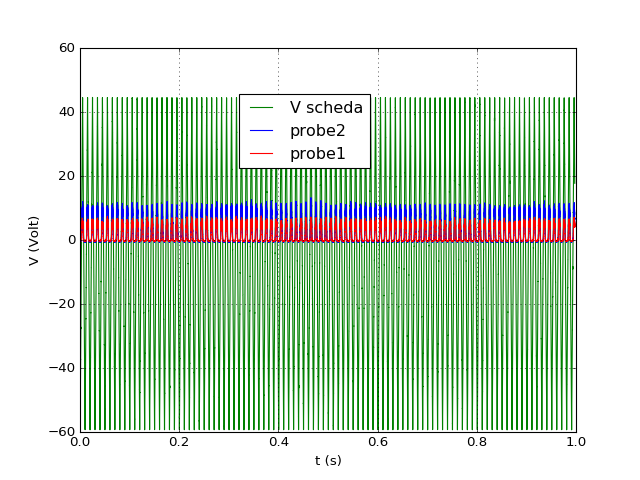

In [29]:
file_path1 = 'data/data_raw_calib3/160513003.txt' 
df1 = binning.read_data(file_path1, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df1,  -0.019987947186552155)
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', 2)])
binning.calculate_data(df1, R_2) #compute the current and v_probe

file_path2 = 'data/data_raw_calib3/160513006.txt' 
df2 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df2, 0.010159781877431426)
binning.amplify_data(df2,[('v_scheda',7.41),('v_res', -2)])
binning.calculate_data(df2, R_1) #compute the current and v_probe
fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda_ampl,'g', label="V scheda")
ax.plot(df1.t, df1.v_res_ampl,'b', label="probe2")
ax.plot(df2.t, df2.v_res_ampl, 'r', label="probe1")
ax.legend(bbox_to_anchor=(0.6,0.9))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")

The two signals are different. 

### Checking fitted data for dataset data_calib3

In [30]:
df_total = agg.aggregate_data('data/data_calib3')



Reading dataset:['160513005', '160513003', '160513002', '160513006', '160513004', '160513001']


In [31]:
df_total
df_total.set_index(['probe','W_em','x'])

id  I_B         P       T_e   err_T_e           n_e  \
probe W_em x                                                                 
1     60    0   160513005  600  0.000155  4.549618  0.029357  1.611898e+16   
2     60    10  160513005  600  0.000155  4.882518  0.031888  3.608076e+16   
1     70   -10  160513003  600  0.000155  4.414404  0.030220  2.072519e+16   
2     70    0   160513003  600  0.000155  5.135853  0.021011  4.137192e+16   
1     60   -10  160513002  600  0.000155  4.258900  0.025591  1.426818e+16   
2     60    0   160513002  600  0.000155  4.484488  0.031675  3.524285e+16   
1     70    0   160513006  600  0.000155  4.739727  0.024099  2.608949e+16   
2     70    10  160513006  600  0.000155  5.734479  0.018956  4.366936e+16   
1     50    0   160513004  600  0.000155  4.685248  0.027263  1.468268e+16   
2     50    10  160513004  600  0.000155  4.843717  0.037224  3.330310e+16   
1     50   -10  160513001  600  0.000155  4.340093  0.024100  1.519552e+16   
2     50    0   160513001  600  0.000155  4.647924  0.031074  3.275116e+16   

                     err_n_e          f_ep      err_f_ep   v_plasma  \
probe W_em x                                                          
1     60    0   1.141296e+14  1.140106e+09  2.504024e-10   8.784645   
2     60    10  1.777420e+14  1.705745e+09  1.164455e-10  12.673024   
1     70   -10  1.167473e+14  1.292783e+09  1.756894e-10   9.650185   
2     70    0   1.303611e+14  1.826540e+09  6.955618e-11  13.269598   
1     60   -10  8.479424e+13  1.072656e+09  2.233880e-10   8.517576   
2     60    0   1.809028e+14  1.685822e+09  1.227680e-10  11.905151   
1     70    0   1.169663e+14  1.450471e+09  1.246260e-10  10.195675   
2     70    10  1.150800e+14  1.876570e+09  5.662144e-11  14.429379   
1     50    0   9.853682e+13  1.088126e+09  2.486776e-10   8.195501   
2     50    10  1.837978e+14  1.638772e+09  1.357875e-10  12.548477   
1     50   -10  7.608959e+13  1.106966e+09  1.823888e-10   8.628956   
2     50    0   1.501498e+14  1.625136e+09  1.137447e-10  12.006438   

                err_v_plasma     alpha  err_alpha  v_floating  err_v_floating  \
probe W_em x                                                                    
1     60    0       0.127293  0.027084   0.000737   -4.864208        0.039220   
2     60    10      0.141531  0.015512   0.000309   -1.974530        0.045865   
1     70   -10      0.116363  0.020891   0.000457   -3.593026        0.025702   
2     70    0       0.082324  0.014024   0.000200   -2.137962        0.019290   
1     60   -10      0.106941  0.026656   0.000592   -4.259125        0.030170   
2     60    0       0.139810  0.015858   0.000318   -1.548313        0.044786   
1     70    0       0.093284  0.018550   0.000362   -4.023506        0.020985   
2     70    10      0.072492  0.012458   0.000167   -2.774058        0.015624   
1     50    0       0.117557  0.028888   0.000731   -5.860242        0.035768   
2     50    10      0.156725  0.015947   0.000339   -1.982674        0.045052   
1     50   -10      0.097363  0.024181   0.000457   -4.391322        0.025064   
2     50    0       0.128189  0.015391   0.000266   -1.937335        0.034969   

                i_ionic_sat  err_i_ionic_sat      j_sat  
probe W_em x                                             
1     60    0     -0.000229         0.000003 -19.071920  
2     60    10    -0.000531         0.000004 -44.224927  
1     70   -10    -0.000290         0.000003 -24.154831  
2     70    0     -0.000624         0.000003 -52.009360  
1     60   -10    -0.000196         0.000002 -16.333782  
2     60    0     -0.000497         0.000004 -41.399674  
1     70    0     -0.000378         0.000003 -31.507346  
2     70    10    -0.000696         0.000003 -58.008727  
1     50    0     -0.000212         0.000003 -17.629549  
2     50    10    -0.000488         0.000004 -40.657762  
1     50   -10    -0.000211         0.000002 -17.560405  
2     50    0     -0.000470         0.000003 -

In [37]:
s1 = df_total[(df_total.probe==1) & (df_total.x==0)].set_index('W_em')
s2 = df_total[(df_total.probe==2) & (df_total.x==0)].set_index('W_em')

fig, ax = plt.subplots(1,1)
ax.plot(s1.index, s2.i_ionic_sat / s1.i_ionic_sat,'og', label="ration I ionic")
ax.plot(s2.index, s2.T_e / s1.T_e,'or',label="ration T_e")
ax.plot(s2.index, s2.v_plasma / s1.v_plasma,'ob',label="ratio V_plasma")
ax.set_ylabel('Ratio 2/1')
ax.set_xlabel('$W_{em}$ (%)')
ax.set_xbound(45,75)
ax.set_ybound(0.8,2.3)
ax.legend(bbox_to_anchor=(0.4,1))
ax.grid()
fig.savefig("export/calibration/calibration_current_previous_changeddisac.png")

bias_mean = (s2.i_ionic_sat/ s1.i_ionic_sat).mean()
std=(s2.i_ionic_sat/ s1.i_ionic_sat).std()

print("I ionic saturation BIAS ration: {} +- {}".format(round(bias_mean,5), round(std,5)))
print("T_e BIAS ration {} +- {}".format(round((s2.T_e/ s1.T_e).mean(),5), round((s2.T_e /s1.T_e).std(),5)))
print("V Plasma {} +- {}".format(round((s2.v_plasma/ s1.v_plasma).mean(),5), round((s2.v_plasma /s1.v_plasma).std(),5)))



<IPython.core.display.Javascript object>

I ionic saturation BIAS ration: 2.01437 +- 0.31597
T_e BIAS ration 1.02043 +- 0.05478
V Plasma 1.37391 +- 0.08334


We think that we have small errors in the position and thickness of the probes. The temperatures at x=0 are more compatible than before even if they reach different V_res_max. We don't know the theory for the behaviour of the probes in electronic saturation. 

The best parameters for calibration are W_em = 60%  and P=1.55e-4 mbar

## Changed probe 2 (fused by granucci)

We have changed probe 2. Thus, we are recalibrating the x=0 point with different powers. Then we analyze the intereference shutting off one probe and taking data always on x=0.

### We have removed the offset!

In [38]:
df_a = agg.aggregate_data('data/data-2605')
df_b = agg.aggregate_data('data/data-2605-interference')
df_a.set_index(['probe','W_em','x'])
df_b.set_index(['probe','W_em','x'])



Reading dataset:['160526003', '160526011', '160526004', '160526010', '160526005', '160526009']
Reading dataset:['160526013', '160526012', '160526006', '160526014', '160526008', '160526007']


id  I_B         P       T_e       err_T_e  \
probe W_em x                                                       
1     60   -10  160526013  600  0.000156  0.010964  1.066875e+06   
2     60    0   160526013  600  0.000156  4.579116  2.732562e-02   
1     50   -10  160526012  600  0.000156  0.002994  1.425407e+07   
2     50    0   160526012  600  0.000156  4.439633  2.386950e-02   
1     50    0   160526006  600  0.000156  4.170124  2.845459e-02   
2     50    10  160526006  600  0.000156  0.355063  1.295818e+00   
1     70   -10  160526014  600  0.000156  0.009839  5.309034e+06   
2     70    0   160526014  600  0.000156  4.800860  1.723286e-02   
1     70    0   160526008  600  0.000156  4.298064  2.064084e-02   
2     70    10  160526008  600  0.000156  0.000072  1.401104e+05   
1     60    0   160526007  600  0.000156  4.315790  2.347568e-02   
2     60    10  160526007  600  0.000156  0.000032  0.000000e+00   

                         n_e       err_n_e          f_ep  err_f_ep   v_plasma  \
probe W_em x                                                                    
1     60   -10 -1.406229e+16 -6.841842e+23           NaN       NaN  23.350712   
2     60    0   3.591794e+16  1.617766e+14  1.701892e+09       NaN  12.851961   
1     50   -10 -2.621670e+16 -6.240329e+25           NaN       NaN  27.877684   
2     50    0   3.284239e+16  1.334279e+14  1.627398e+09       NaN  12.142919   
1     50    0   1.957318e+16  1.361703e+14  1.256340e+09       NaN  10.013730   
2     50    10  6.672592e+14  1.217689e+15  2.319656e+08       NaN  16.651448   
1     70   -10 -1.528825e+16 -4.124865e+24           NaN       NaN  27.902640   
2     70    0   4.143422e+16  1.126435e+14  1.827915e+09       NaN  13.477309   
1     70    0   2.575606e+16  1.142295e+14  1.441173e+09       NaN  11.210957   
2     70    10  3.649529e+16  3.555974e+25  1.715516e+09       NaN  -0.627598   
1     60    0   2.421577e+16  1.217553e+14  1.397415e+09       NaN  10.974308   
2     60    10  7.267630e+16  1.245821e+19  2.420877e+09       NaN  26.713117   

                err_v_plasma     alpha  err_alpha  v_floating  err_v_floating  \
probe W_em x                                                                    
1     60   -10  3.961708e+06 -0.000140   0.014964   23.317821    7.610842e+05   
2     60    0   1.150129e-01  0.013600   0.000277   -0.885387    3.303608e-02   
1     50   -10  4.613712e+07 -0.000030   0.003079   27.868701    3.374912e+06   
2     50    0   1.043584e-01  0.014570   0.000256   -1.175979    3.274995e-02   
1     50    0   1.303284e-01  0.024345   0.000652   -2.496643    4.496461e-02   
2     50    10  6.401065e+00 -0.000077   0.001223   15.586258    2.513612e+00   
1     70   -10  1.820337e+07 -0.000008   0.000392   27.873124    2.276270e+06   
2     70    0   6.781080e-02  0.011564   0.000161   -0.925271    1.611223e-02   
1     70    0   8.416073e-02  0.018017   0.000364   -1.683236    2.223820e-02   
2     70    10  6.418262e+05  0.000392   0.034031   -0.627814    2.214951e+05   
1     60    0   1.019430e-01  0.019297   0.000417   -1.973062    3.151592e-02   
2     60    10  9.662995e+06 -0.000035   0.012272   26.713022    9.662995e+06   

                i_ionic_sat  err_i_ionic_sat      j_sat  
probe W_em x                                             
1     60   -10     0.000010     1.044796e-03   0.816787  
2     60    0     -0.000512     3.452468e-06 -42.635540  
1     50   -10     0.000010     9.726682e-04   0.795769  
2     50    0     -0.000461     2.806296e-06 -38.386432  
1     50    0     -0.000266     3.226287e-06 -22.172026  
2     50    10    -0.000003     1.203817e-07  -0.220555  
1     70   -10     0.000010     1.804098e-04   0.841190  
2     70    0     -0.000604     2.468021e-06 -50.360291  
1     70    0     -0.000355     2.650739e-06 -29.620020  
2     70    10    -0.000002     1.789588e-04  -0.171659  
1     60    0     -0.000335     2.832243e-06 -27.906025  
2     60    10    -0.000003     9.356974e-04  

<IPython.core.display.Javascript object>


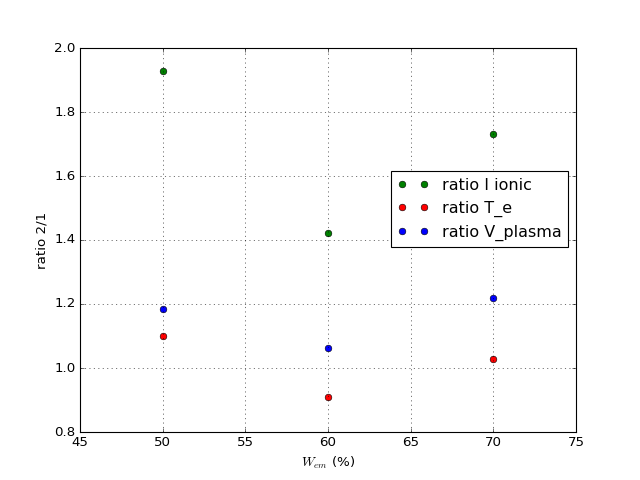

I ionic saturation BIAS ration: 1.6929 +- 0.25486
T_e BIAS ration 1.01351 +- 0.09604
V Plasma 1.15573 +- 0.08168


In [39]:
s1 = df_a[(df_a.probe==1) & (df_a.x==0)].set_index('W_em')
s2 = df_a[(df_a.probe==2) & (df_a.x==0)].set_index('W_em')

fig, ax = plt.subplots(1,1)
ax.plot(s1.index, s2.i_ionic_sat / s1.i_ionic_sat,'og', label="ratio I ionic")
ax.plot(s2.index, s2.T_e / s1.T_e,'or',label="ratio T_e")
ax.plot(s2.index, s2.v_plasma / s1.v_plasma,'ob',label="ratio V_plasma")

ax.set_xlabel('$W_{em}$ (%)')
ax.set_xbound(45,75)
ax.set_ylabel('ratio 2/1')
ax.legend(bbox_to_anchor=(1,0.7))
ax.grid()
fig.savefig("export/calibration/calibration_current.png")

bias_mean = (s2.i_ionic_sat/ s1.i_ionic_sat).mean()
std=(s2.i_ionic_sat/ s1.i_ionic_sat).std()

print("I ionic saturation BIAS ration: {} +- {}".format(round(bias_mean,5), round(std,5)))
print("T_e BIAS ration {} +- {}".format(round((s2.T_e/ s1.T_e).mean(),5), round((s2.T_e /s1.T_e).std(),5)))
print("V Plasma {} +- {}".format(round((s2.v_plasma/ s1.v_plasma).mean(),5), round((s2.v_plasma /s1.v_plasma).std(),5)))


<IPython.core.display.Javascript object>


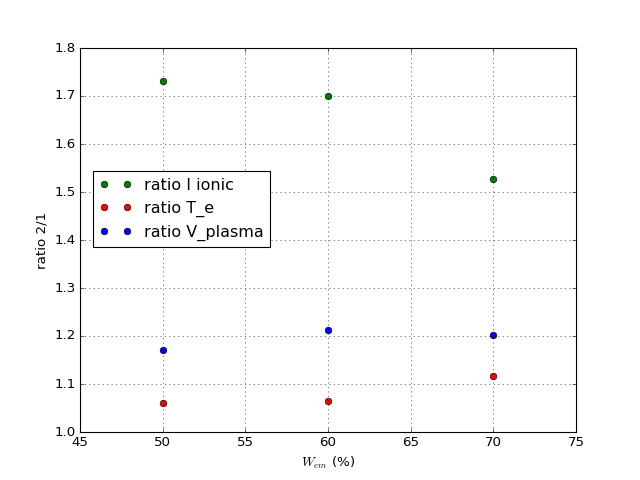

I ionic saturation BIAS ration: 1.65311 +- 0.10961
T_e BIAS ration 1.08087 +- 0.03132
V Plasma 1.19529 +- 0.0216


0.65311232363711003

In [40]:
s1 = df_b[(df_b.probe==1) & (df_b.x==0)].set_index('W_em')
s2 = df_b[(df_b.probe==2) & (df_b.x==0)].set_index('W_em')

fig, ax = plt.subplots(1,1)
ax.plot(s1.index, s2.i_ionic_sat / s1.i_ionic_sat,'og', label="ratio I ionic")
ax.plot(s2.index, s2.T_e / s1.T_e,'or',label="ratio T_e")
ax.plot(s2.index, s2.v_plasma / s1.v_plasma,'ob',label="ratio V_plasma")
ax.set_xlabel('$W_{em}$ (%)')
ax.set_xbound(45,75)
ax.set_ylabel('ratio 2/1')
ax.legend(bbox_to_anchor=(0.4,0.7))
ax.grid()
fig.savefig("export/calibration/calibratio_current_no_interference.png")

bias_mean = (s2.i_ionic_sat/ s1.i_ionic_sat).mean()
std=(s2.i_ionic_sat/ s1.i_ionic_sat).std()

print("I ionic saturation BIAS ration: {} +- {}".format(round(bias_mean,5), round(std,5)))
print("T_e BIAS ration {} +- {}".format(round((s2.T_e/ s1.T_e).mean(),5), round((s2.T_e /s1.T_e).std(),5)))
print("V Plasma {} +- {}".format(round((s2.v_plasma/ s1.v_plasma).mean(),5), round((s2.v_plasma /s1.v_plasma).std(),5)))


((s2.i_ionic_sat - s1.i_ionic_sat) / s1.i_ionic_sat).mean()

<IPython.core.display.Javascript object>


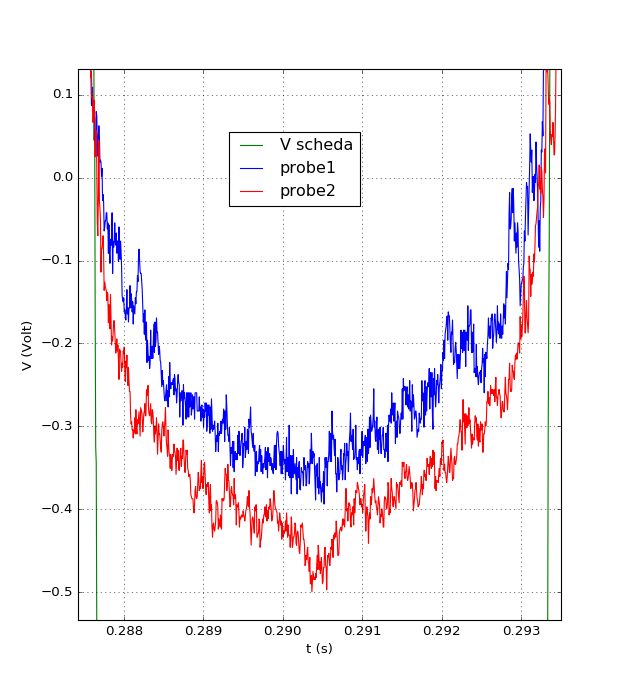

In [16]:
file_path1 = 'data/data_raw-2605/160526004.txt'
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df1, -0.011380103326612902)
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', -2)])
binning.calculate_data(df1, R_1) #compute the current and v_probe

file_path2 = 'data/data_raw-2605/160526010.txt'
df2 = binning.read_data(file_path2, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df2,-0.023587134576612902)
binning.amplify_data(df2,[('v_scheda',7.41),('v_res', 2)])
binning.calculate_data(df2, R_2) #compute the current and v_probe

fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda_ampl,'g', label="V scheda")
ax.plot(df1.t, df1.v_res_ampl,'b', label="probe1")
ax.plot(df2.t, df2.v_res_ampl, 'r',label="probe2")
ax.legend(bbox_to_anchor=(0.6,0.9))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")

<IPython.core.display.Javascript object>


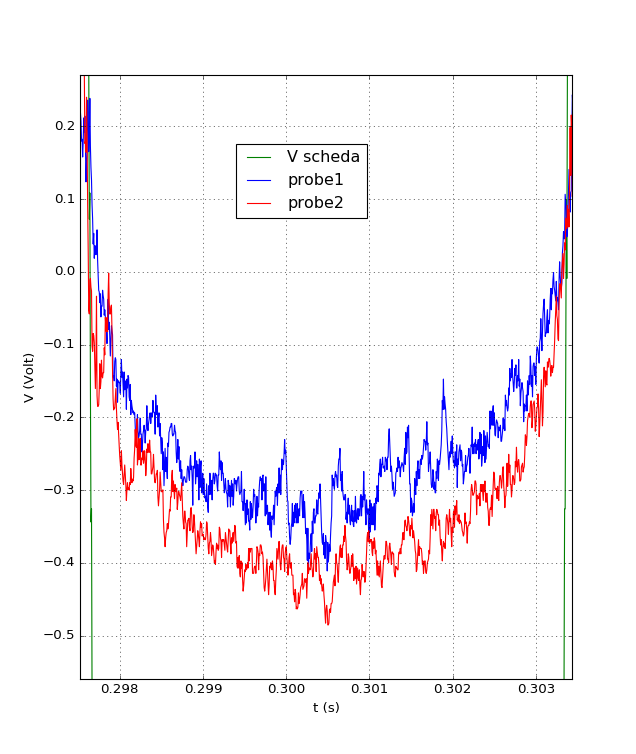

In [17]:
file_path1 = 'data/data_raw-2605/160526007.txt'
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df1, -0.011380103326612902)
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', -2)])
binning.calculate_data(df1, R_1) #compute the current and v_probe

file_path2 = 'data/data_raw-2605/160526013.txt'
df2 = binning.read_data(file_path2, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df2,-0.023587134576612902)
binning.amplify_data(df2,[('v_scheda',7.41),('v_res', 2)])
binning.calculate_data(df2, R_2) #compute the current and v_probe

fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda_ampl,'g', label="V scheda")
ax.plot(df1.t, df1.v_res_ampl,'b', label="probe1")
ax.plot(df2.t, df2.v_res_ampl, 'r',label="probe2")
ax.legend(bbox_to_anchor=(0.6,0.9))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")

## Stima errori

<IPython.core.display.Javascript object>


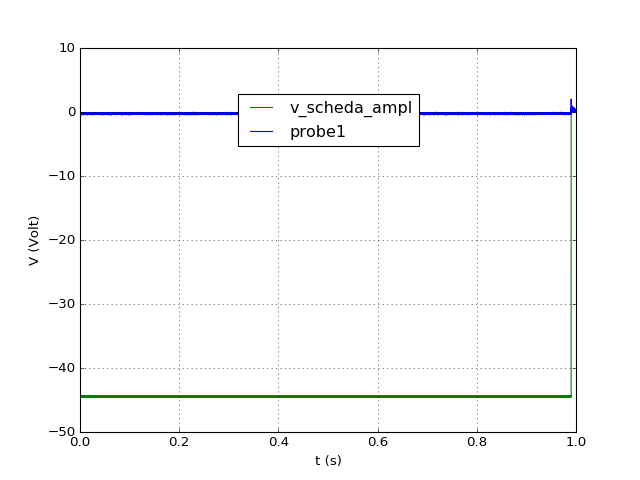

V_res std 0.061258010933250374


In [19]:
file_path1 = 'data/data_calib_isat/160509046.txt'
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df1,[('v_scheda',7.41),('v_res', -2)])
binning.calculate_data(df1, R_1) #compute the current and v_probe
fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda_ampl,'g')
ax.plot(df1.t, df1.v_res_ampl,'b', label="probe1")
ax.legend(bbox_to_anchor=(0.7,0.9))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")
print("V_res std {}".format(df1[(df1.t>0.2)& (df1.t<0.4)].v_res_ampl.std()))